# Bike Sharing Case Study

## Problem Statement
Boombikes, the bike sharing company provides bikes to individuals on sharing basis. Due to considerable
dips in the revenue due to covid the company decided to accelerate its revenue to cater people's needs and make profits
Boombikes want to understand the factors on which the demand for Bike Sharing in American Markets. 
To find out :
1. The variables are significant in predicting the demand for shared bikes.
2. How the variables contribute the bike demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

#### Data Load

In [2]:
bike_rental = pd.read_csv( "C:/Users/I350694/Downloads/day.csv" )
bike_rental.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_rental.shape
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Preprocessing
#### Fields Casual and Registered can be dropped off

In [4]:
cols=["casual","registered", "instant", "dteday"]
bike_set = bike_rental.drop(cols, axis = 1)
bike_set.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
bike_set.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Exploratory Data Analysis

<Figure size 1600x1000 with 0 Axes>

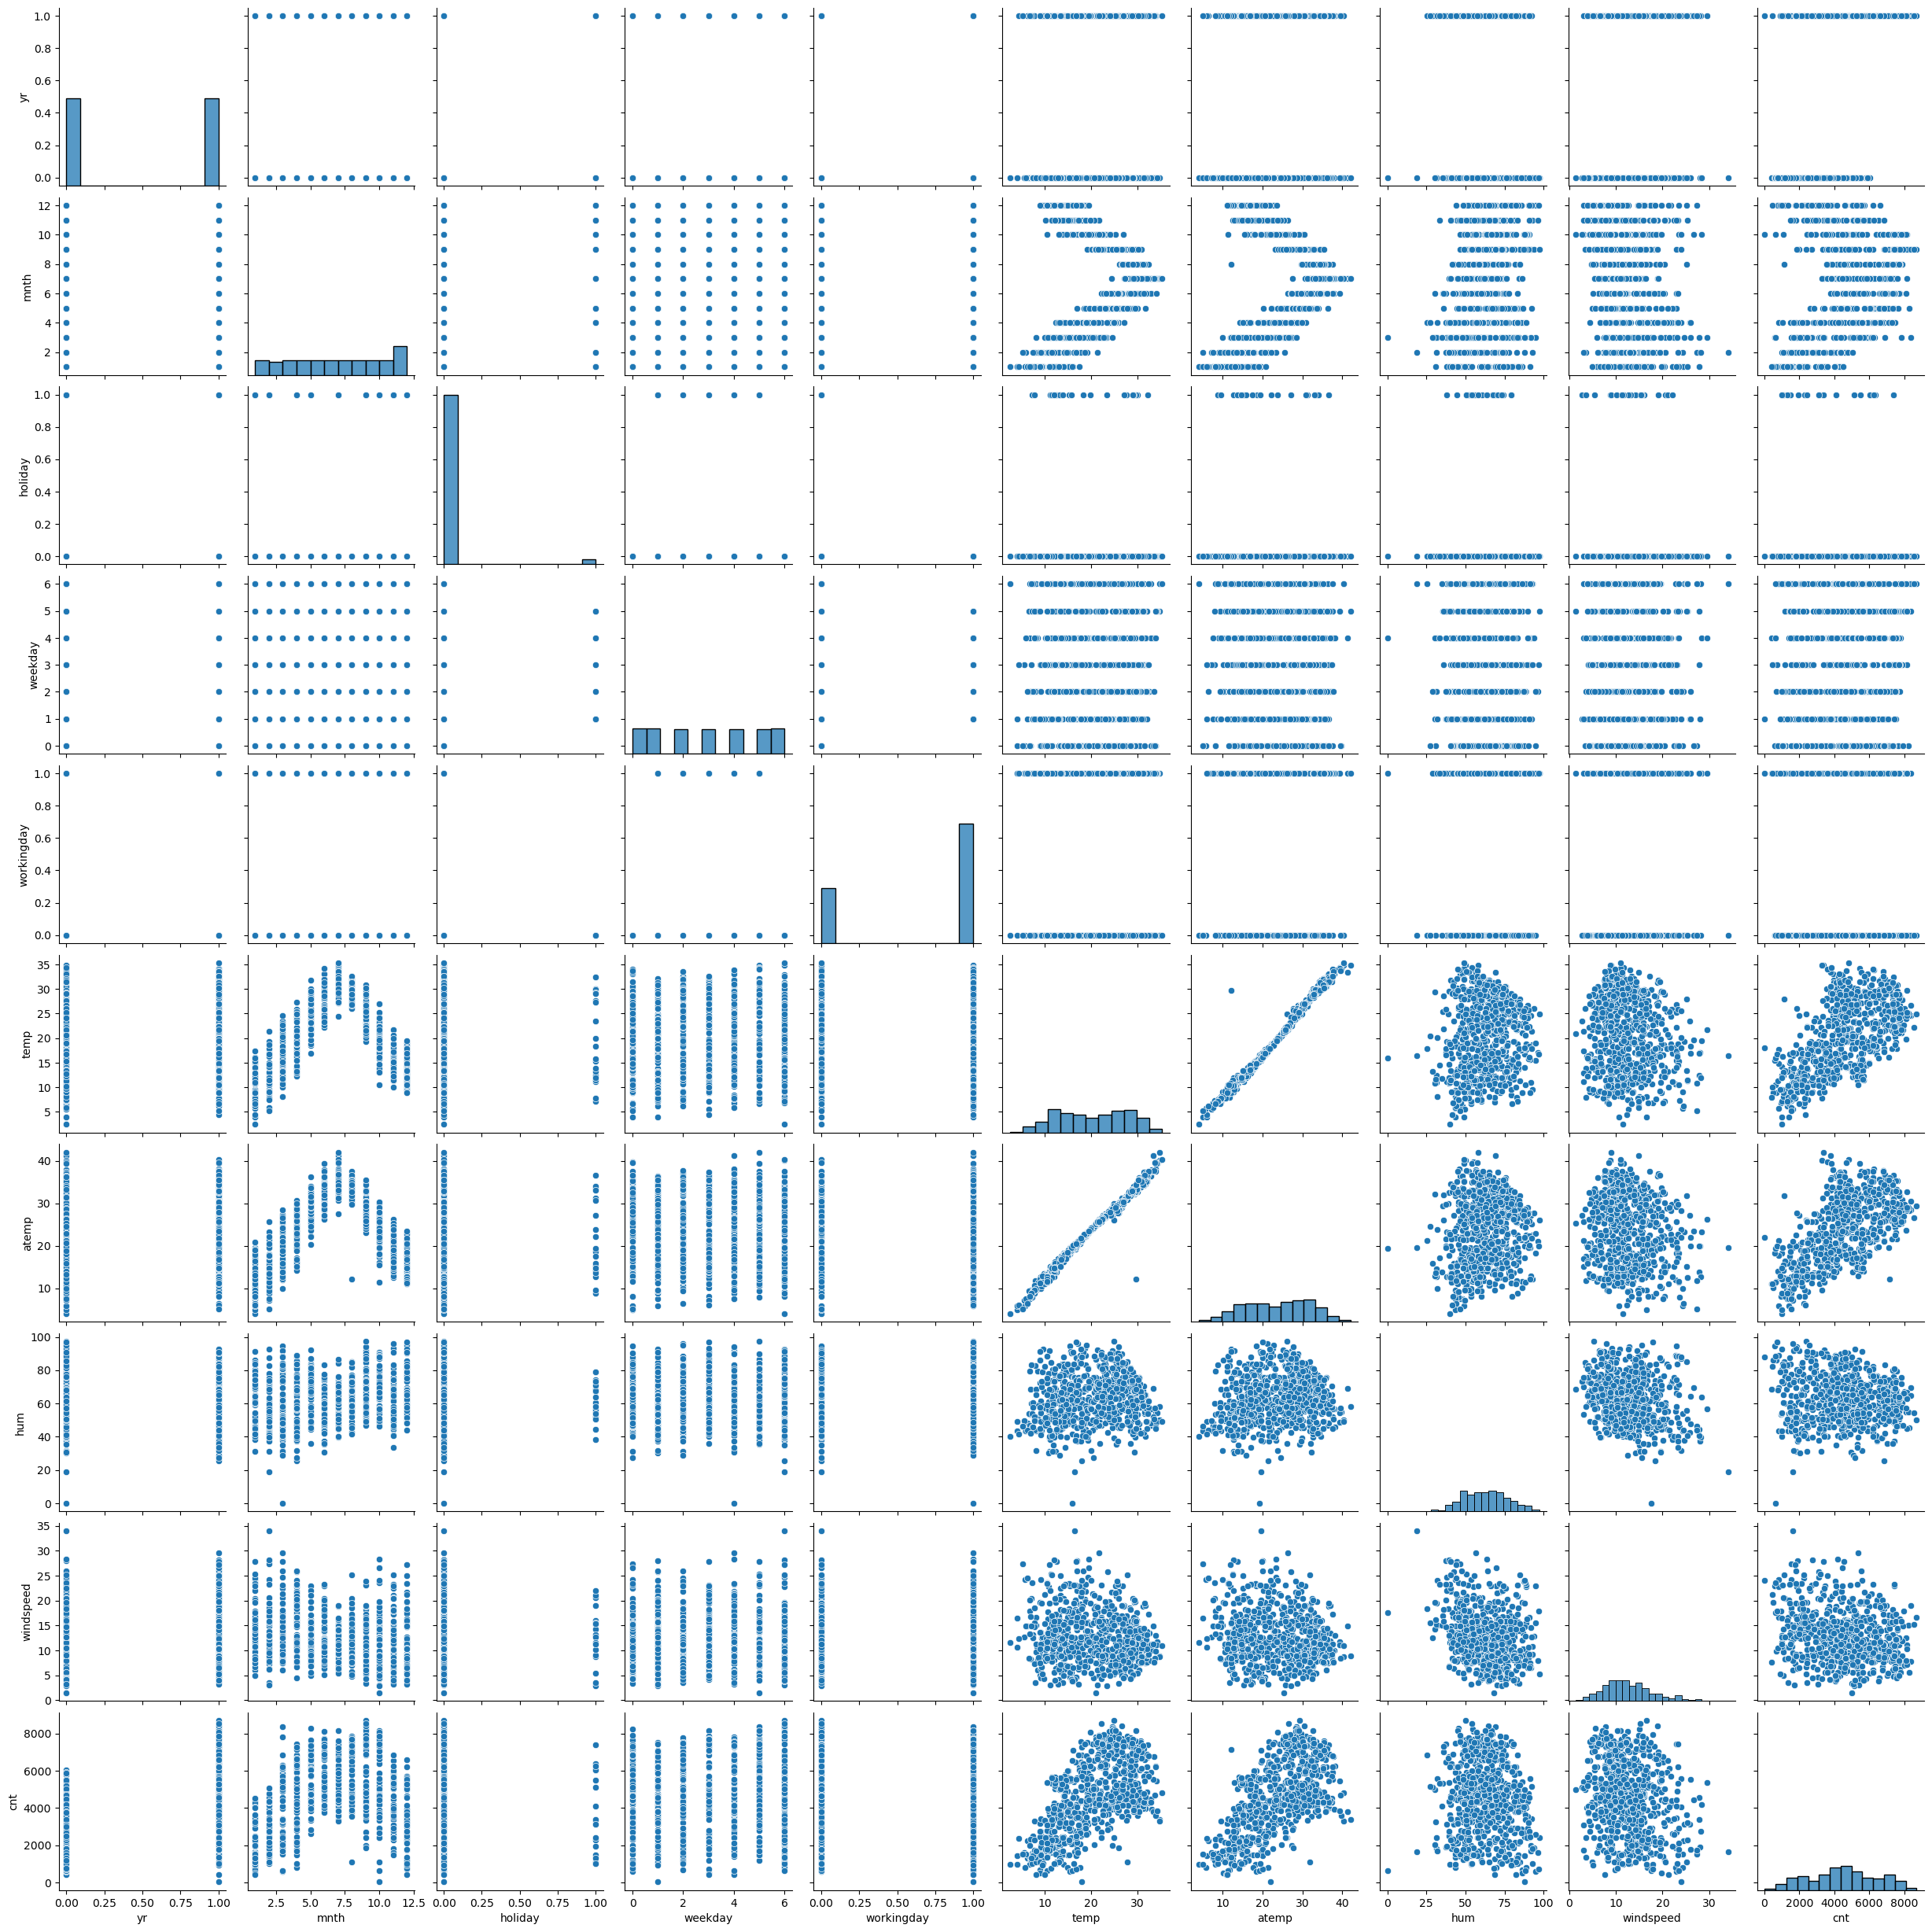

In [48]:
#Visualising Numerical Variables
plt.figure(figsize=(16,10))
sns.pairplot(bike_set)
plt.show()

<Axes: xlabel='temp', ylabel='cnt'>

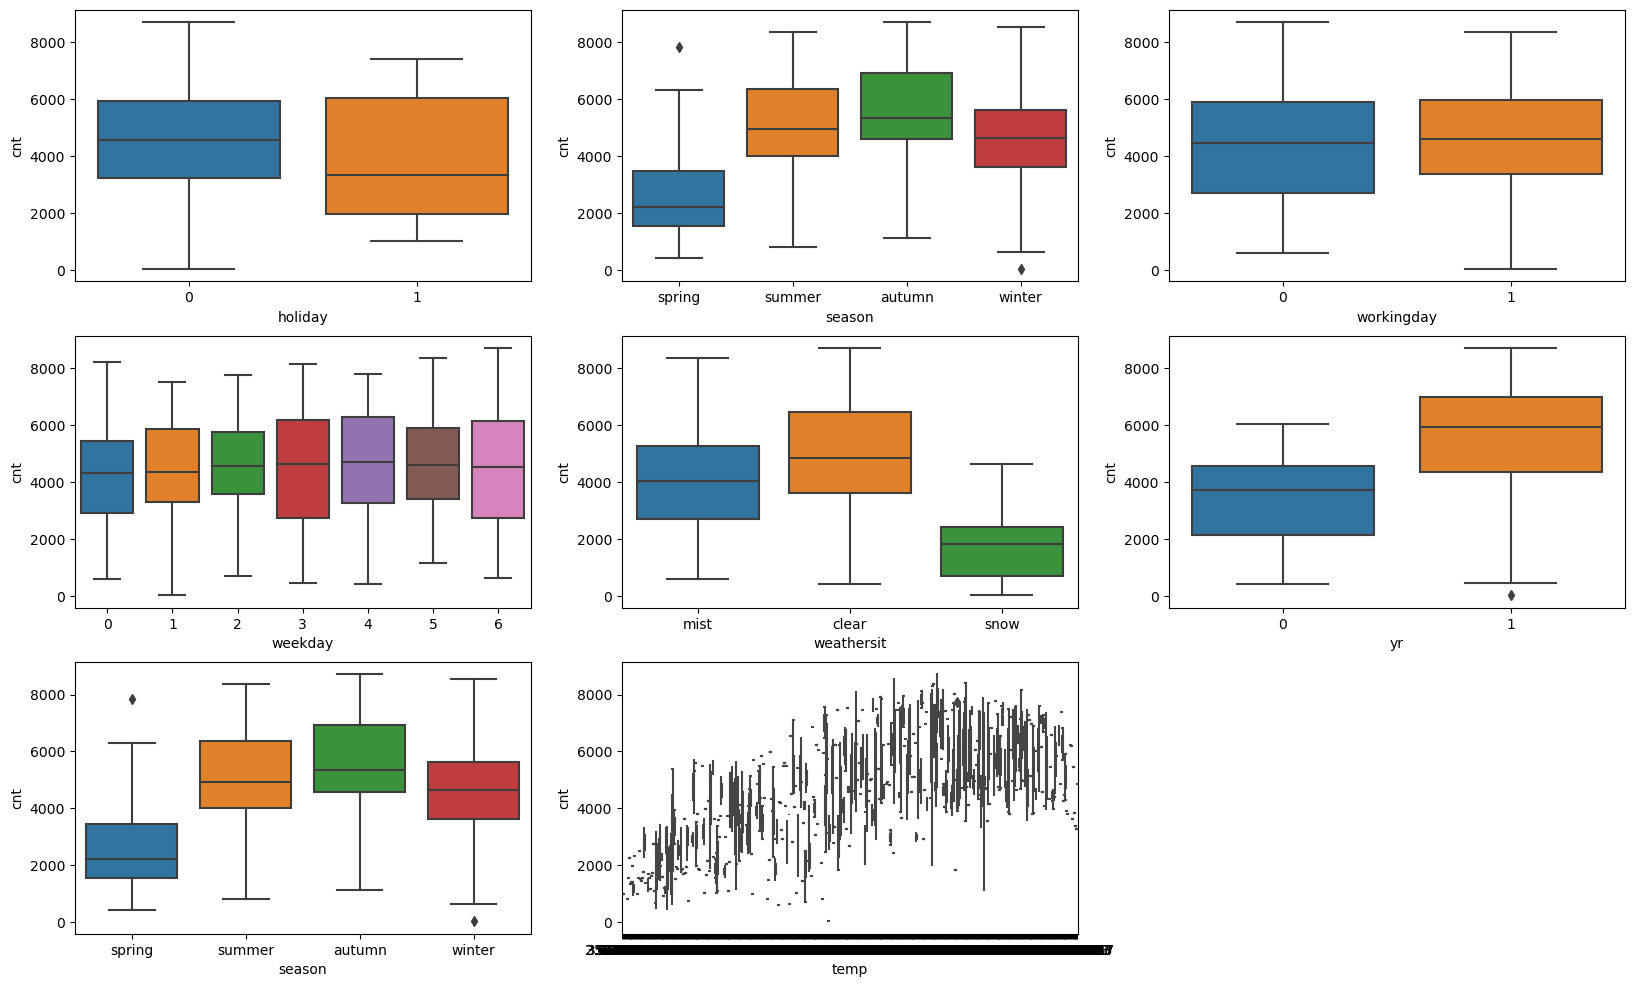

In [54]:
#Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x='holiday', y='cnt', data=bike_set)

plt.subplot(3,3,2)
sns.boxplot(x='season', y='cnt', data=bike_set)

plt.subplot(3,3,3)
sns.boxplot(x='workingday', y='cnt', data=bike_set)

plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data=bike_set)

plt.subplot(3,3,5)
sns.boxplot(x='weathersit', y='cnt', data=bike_set)

plt.subplot(3,3,6)
sns.boxplot(x='yr', y='cnt', data=bike_set)

plt.subplot(3,3,7)
sns.boxplot(x='season', y='cnt', data=bike_set)

plt.subplot(3,3,8)
sns.boxplot(x='temp', y='cnt', data=bike_set)

# Preparing the data for modelling
##### 1. Encoding the categorical variables - Map seasons 1,2,3,4 to original Values( 1: spring, 2:summer, 3:autumn, 4:winter
##### 2. Create dummy variables for categorical data
##### 3. Drop the column with dummy variables which is not required for model creation
##### 4. Spliting to train and test set
##### 5. Rescaling the data

In [11]:
#1. Encoding the categorical variables - Map seasons 1,2,3,4 to original Values( 1: spring, 2:summer, 3:autumn, 4:winter
bike_set["season"] = bike_set["season"].map({ 1: "spring", 2: "summer", 3 : "autumn", 4: "winter"})
bike_set["weathersit"] = bike_set["weathersit"].map({ 1: "clear", 2: "mist", 3 : "snow", 4: "rain"})

In [12]:
bike_set.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#2. Create dummy variables for categorical data
season = pd.get_dummies(bike_set["season"],drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
#3. Drop the column with dummy variables which is not required for model creation
bike_data=pd.concat([bike_set, season], axis = 1) #row
bike_data = bike_data.drop("season", axis = 1)
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [15]:
weathersit = pd.get_dummies(bike_data["weathersit"],drop_first = True)
weathersit.head()

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [16]:
bike_data=pd.concat([bike_data, weathersit], axis = 1) #row
bike_data = bike_data.drop("weathersit", axis = 1)
bike_data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist,snow
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [17]:
#4. Spliting to train and test set
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state = 100 )
print(df_train.shape)
df_test.shape

(510, 15)


(220, 15)

In [18]:
#5 Rescaling the data
#a. Min max scaling
scaler = MinMaxScaler()
scale = ["temp", "atemp","hum","windspeed","cnt","mnth","weekday"]
#b. Fit the data
df_train[scale] = scaler.fit_transform(df_train[scale])
df_train.head()



,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist,snow
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0


In [19]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist,snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.345098,0.029412
std,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


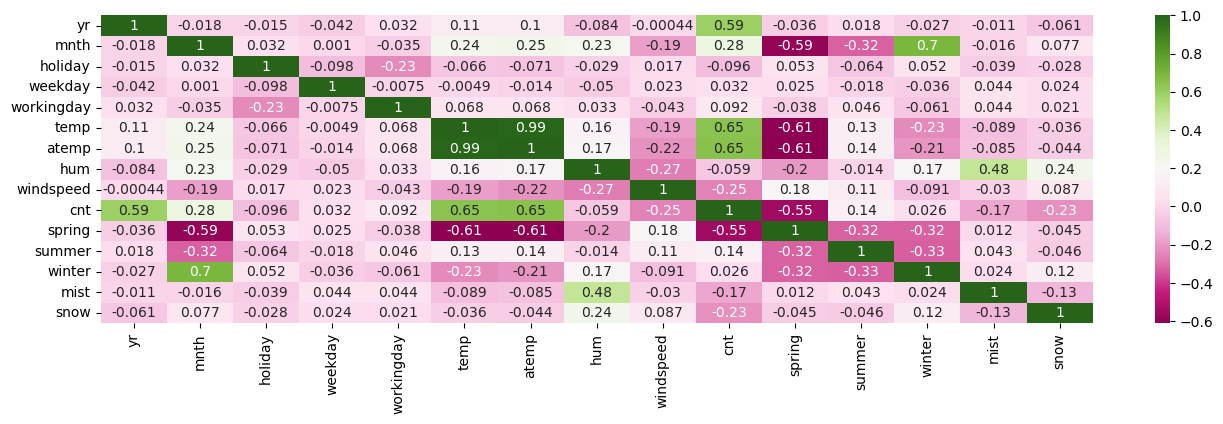

In [20]:
plt.figure(figsize=(16,4))
sns.heatmap(df_train.corr(),annot = True, cmap="PiYG")
plt.show()

# Building the Model
## We need to find the relationship between y with respect to x
## Make Cnt as the y variable in the training set
## Make all other columns as X variable in the training set

In [21]:
#Building the model 
y_train = df_train.pop("cnt")
X_train = df_train
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,mist,snow
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0,1,0,1,0


In [22]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [49]:
#Add variables one by one and observe R-squared
X_train_sm = X_train[["temp", "yr", "hum","mnth","holiday","windspeed","summer","winter",'mist',"snow"]]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()
lr = sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          3.80e-181
Time:                        21:38:52   Log-Likelihood:                 482.06
No. Observations:                 510   AIC:                            -942.1
Df Residuals:                     499   BIC:                            -895.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2106      0.028      7.468      0.000       0.155       0.266
temp           0.5647      0.025     22.598      0.000       0.516       0.614
yr             0.2299      0.009     26.875      0.000       0.213       0.247
hum           -0.1583      0.039     -4.032      0.000      -0.235      -0.081
mnth           0.0535      0.023      2.277      0.023       0.007       0.100
holiday       -0.0893      0.027     -3.321      0.001      -0.142      -0.036
windspeed     -0.1923      0.027     -7.139      0.000      -0.245      -0.139
summer         0.0816      0.011      7.654      0.000       0.061       0.103
winter         0.1053      0.017      6.253      0.000       0.072       0.138
mist          -0.0486      0.011     -4.412      0.000      -0.070      -0.027
snow          -0.2307      0.028     -8.342      0.000      -0.285      -0.176
==============================================================================
Omnibus:                       58.136   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.599
Skew:                          -0.609   Prob(JB):                     3.59e-30
Kurtosis:                       5.213   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculate VIF

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif.head(20)

,Features,VIF
5,temp,379.33
6,atemp,366.74
7,hum,30.16
1,mnth,12.48
8,windspeed,5.02
11,winter,4.63
9,spring,4.49
4,workingday,3.20
3,weekday,3.17
10,summer,2.72


In [25]:
#drop Month and see the Rsquared has increased 
X = X_train.drop("mnth", axis = 1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.52e-183
Time:                        21:20:36   Log-Likelihood:                 495.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     496   BIC:                            -904.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2470      0.037      6.740      0.000       0.175       0.319
yr             0.2320      0.008     27.719      0.000       0.216       0.248
holiday       -0.0632      0.027     -2.333      0.020      -0.116      -0.010
weekday        0.0487      0.012      3.920      0.000       0.024       0.073
workingday     0.0186      0.009      2.049      0.041       0.001       0.036
temp           0.4333      0.139      3.123      0.002       0.161       0.706
atemp          0.0632      0.142      0.446      0.656      -0.215       0.342
hum           -0.1260      0.039     -3.250      0.001      -0.202      -0.050
windspeed     -0.1780      0.027     -6.590      0.000      -0.231      -0.125
spring        -0.0755      0.021     -3.670      0.000      -0.116      -0.035
summer         0.0432      0.014      3.098      0.002       0.016       0.071
winter         0.0878      0.017      5.142      0.000       0.054       0.121
mist          -0.0569      0.011     -5.246      0.000      -0.078      -0.036
snow          -0.2471      0.027     -9.077      0.000      -0.301      -0.194
==============================================================================
Omnibus:                       73.717   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.521
Skew:                          -0.733   Prob(JB):                     1.91e-41
Kurtosis:                       5.584   Cond. No.                         88.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif.head(20)

,Features,VIF
4,temp,378.25
5,atemp,366.74
6,hum,27.41
7,windspeed,4.91
8,spring,3.97
10,winter,3.24
3,workingday,3.19
2,weekday,3.12
9,summer,2.38
11,mist,2.29


In [27]:
#drop feeling temparature
X = X.drop("atemp", axis = 1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.89e-184
Time:                        21:20:39   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2469      0.037      6.741      0.000       0.175       0.319
yr             0.2319      0.008     27.737      0.000       0.216       0.248
holiday       -0.0637      0.027     -2.357      0.019      -0.117      -0.011
weekday        0.0484      0.012      3.906      0.000       0.024       0.073
workingday     0.0186      0.009      2.048      0.041       0.001       0.036
temp           0.4933      0.034     14.475      0.000       0.426       0.560
hum           -0.1252      0.039     -3.236      0.001      -0.201      -0.049
windspeed     -0.1803      0.026     -6.810      0.000      -0.232      -0.128
spring        -0.0744      0.020     -3.645      0.000      -0.115      -0.034
summer         0.0444      0.014      3.245      0.001       0.018       0.071
winter         0.0892      0.017      5.319      0.000       0.056       0.122
mist          -0.0570      0.011     -5.261      0.000      -0.078      -0.036
snow          -0.2479      0.027     -9.132      0.000      -0.301      -0.195
==============================================================================
Omnibus:                       72.339   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.291
Skew:                          -0.719   Prob(JB):                     9.59e-41
Kurtosis:                       5.570   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif.head(20)

,Features,VIF
5,hum,27.35
4,temp,15.71
6,windspeed,4.69
7,spring,3.90
3,workingday,3.19
2,weekday,3.11
9,winter,3.10
8,summer,2.28
10,mist,2.28
0,yr,2.08


In [29]:
#drop workingday
X = X.drop("workingday", axis = 1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          9.89e-185
Time:                        21:20:42   Log-Likelihood:                 493.37
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     498   BIC:                            -911.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2606      0.036      7.217      0.000       0.190       0.332
yr             0.2323      0.008     27.704      0.000       0.216       0.249
holiday       -0.0763      0.026     -2.887      0.004      -0.128      -0.024
weekday        0.0476      0.012      3.826      0.000       0.023       0.072
temp           0.4945      0.034     14.465      0.000       0.427       0.562
hum           -0.1263      0.039     -3.255      0.001      -0.203      -0.050
windspeed     -0.1825      0.027     -6.875      0.000      -0.235      -0.130
spring        -0.0747      0.020     -3.647      0.000      -0.115      -0.034
summer         0.0446      0.014      3.249      0.001       0.018       0.072
winter         0.0882      0.017      5.245      0.000       0.055       0.121
mist          -0.0561      0.011     -5.161      0.000      -0.077      -0.035
snow          -0.2459      0.027     -9.036      0.000      -0.299      -0.192
==============================================================================
Omnibus:                       77.245   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.653
Skew:                          -0.785   Prob(JB):                     4.85e-41
Kurtosis:                       5.504   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif.head(20)

,Features,VIF
4,hum,27.04
3,temp,15.35
5,windspeed,4.68
6,spring,3.83
2,weekday,3.11
8,winter,3.08
9,mist,2.28
7,summer,2.26
0,yr,2.08
10,snow,1.24


# Final Model

In [31]:
#drop humidity
X = X.drop("hum", axis = 1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.15e-183
Time:                        21:20:44   Log-Likelihood:                 488.01
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     499   BIC:                            -907.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.030      6.450      0.000       0.135       0.254
yr             0.2355      0.008     28.001      0.000       0.219       0.252
holiday       -0.0766      0.027     -2.870      0.004      -0.129      -0.024
weekday        0.0515      0.012      4.118      0.000       0.027       0.076
temp           0.4678      0.034     13.962      0.000       0.402       0.534
windspeed     -0.1572      0.026     -6.134      0.000      -0.207      -0.107
spring        -0.0817      0.021     -3.971      0.000      -0.122      -0.041
summer         0.0403      0.014      2.922      0.004       0.013       0.067
winter         0.0771      0.017      4.638      0.000       0.044       0.110
mist          -0.0767      0.009     -8.603      0.000      -0.094      -0.059
snow          -0.2811      0.025    -11.145      0.000      -0.331      -0.232
==============================================================================
Omnibus:                       75.551   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.846
Skew:                          -0.776   Prob(JB):                     2.41e-39
Kurtosis:                       5.441   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif.head(20)

,Features,VIF
4,windspeed,4.63
3,temp,4.36
2,weekday,3.10
5,spring,2.12
0,yr,2.07
6,summer,1.82
7,winter,1.68
8,mist,1.54
9,snow,1.08
1,holiday,1.05


# Residual Analysis and Predictions

<Axes: ylabel='Density'>

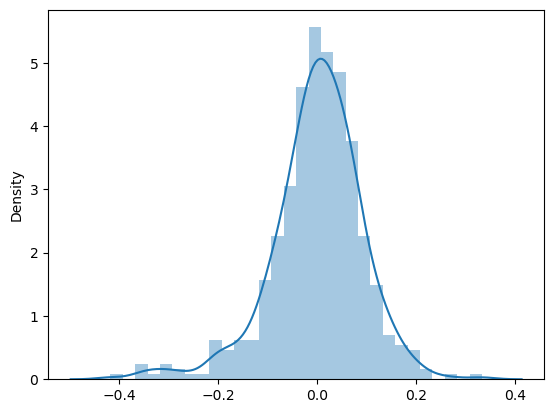

In [33]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

# Predictions and Evaluating the Model Test set
## Rescale the test set

In [34]:
scale = ["temp", "atemp","hum","windspeed","cnt","mnth","weekday"]
#Transform the test data
df_test[scale] = scaler.transform(df_test[scale])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,mist,snow
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0,1,0,1,0


In [35]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist,snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.318182,0.027273
std,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
y_test = df_test.pop("cnt")
X_test = df_test
X_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,mist,snow
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0,0,0,1,0
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0,0,1,1,0
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [37]:
#Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()


,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,mist,snow
184,1.0,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0,0,0,1,0
535,1.0,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,1.0,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0,0,1,1,0
221,1.0,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [38]:
#Drop variables
X_test_sm = X_test_sm.drop(["hum","workingday","atemp", "mnth"], axis = 1)
X_test_sm.head()

,const,yr,holiday,weekday,temp,windspeed,spring,summer,winter,mist,snow
184,1.0,0,1,0.166667,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0,0.500000,0.901354,0.153728,0,1,0,0,0
299,1.0,0,0,0.666667,0.511964,0.334206,0,0,1,1,0
221,1.0,0,0,0.500000,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.666667,0.817246,0.537414,0,1,0,0,0


In [39]:
y_test_pred = lr_model.predict(X_test_sm)

# R2 Score

In [40]:
## Evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8060336146640106

In [50]:
y_test_pred.shape

(220,)

##### The model is well interpretted by the R2 score which is 0.806 and approx same as the Rsquared value 0.828

Text(0, 0.5, 'Count')

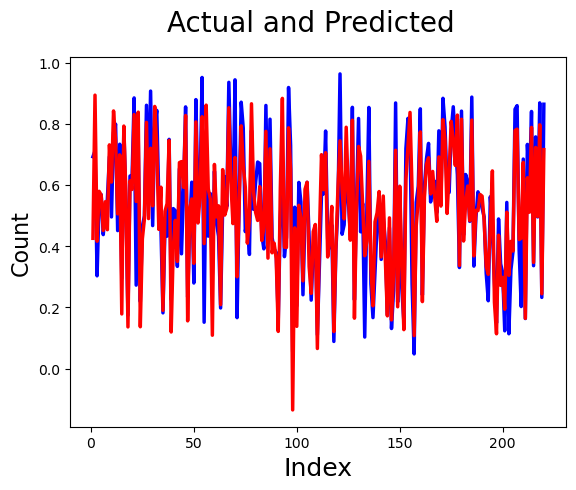

In [53]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Count', fontsize=16)                               # Y-label

# Summary
Temperature and Year [increasing popularity] are the driver variables that could explain the increase in demand. By suitable advertisements/reviews the popularity can be increased. The factors which are negatively impacted are windspeed, spring season, mist and snow. During these times special offers or caimpaign can be done to effectively increase the popularity or demand

Demand( y )  = 0.19 + Year x 0.23 + holiday x (-0.07) + weekdayx0.05 + temp x 0.47 +windspeed x (-0.16) + spring x (-0.08) + summer x 0.04 + winter x 0.07 + mist x (-0.07) + snow x (-0.28 )